<a href="https://colab.research.google.com/github/PeterYves/DIC-ML-Assignmnent/blob/main/week4_binary_classification_of_iris_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification of iris

---


> ### [Problem 1] Select features and categories for practice

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris

iris_data = load_iris()

X = pd.DataFrame(iris_data.data,columns=["sepal_length","sepal_width","petal_length","petal_width"]) 
y = pd.DataFrame(iris_data.target,columns=["Species"])

df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# Extract sepal_length and petal_length with arget that is greater than 0
df = df[['sepal_length', 'petal_length', 'Species']][df['Species'] != 0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


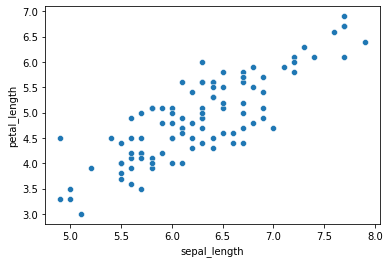

In [3]:
#Visualize the data using the scatter plot matrix
sns.scatterplot(x='sepal_length', y='petal_length', data=df)
sns.set()

### [Problem 2] Data analysis

---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


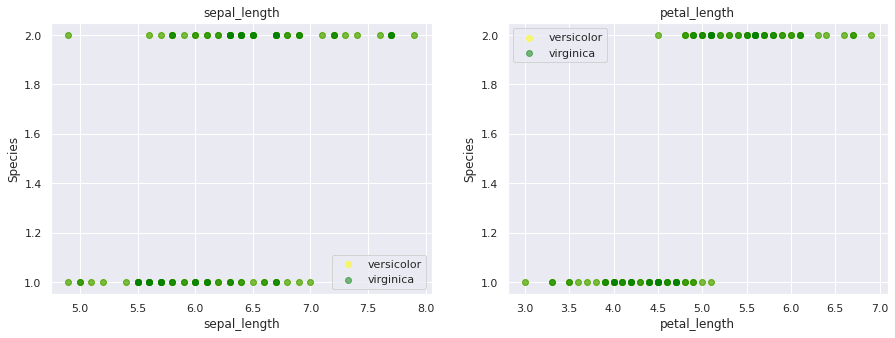

In [4]:
figure = plt.figure(figsize=(15, 5))
variety_names = ['versicolor', 'virginica']
x_features = ['sepal_length', 'petal_length']
colors = ['yellow','green']

for x_feature in range(len(x_features)):
    for a in range(len(variety_names)):
        ax1 = figure.add_subplot(1,2,x_feature+1)
        ax1.scatter(df[x_features[x_feature]],df['Species'],color=colors[a], label=variety_names[a], alpha=0.5)  
    ax1.legend()
    ax1.set_title(x_features[x_feature])
    ax1.set_xlabel(x_features[x_feature])
    ax1.set_ylabel('Species')

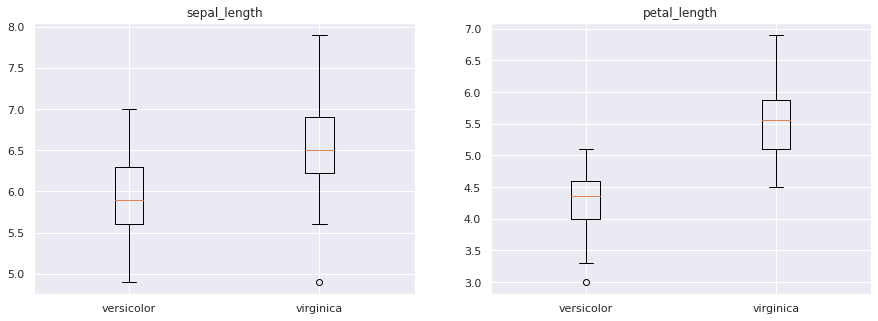

In [5]:
fig = plt.figure(figsize=(15,5))

for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['Species']==i+1]
        x.append(list(target_variety[x_features[feature]]))
    ax2 = fig.add_subplot(1, 2, feature+1)
    ax2.boxplot(x)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

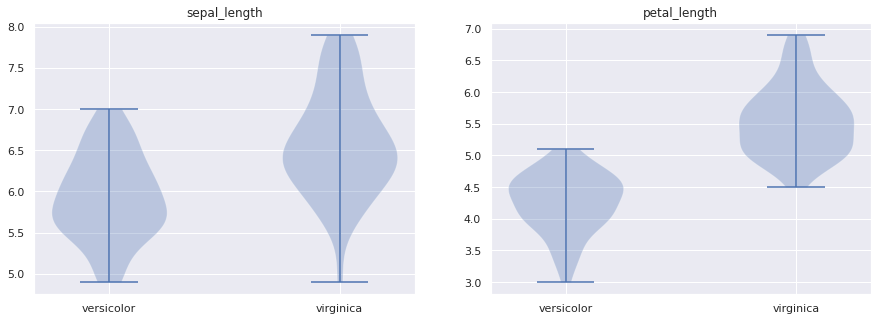

In [6]:
fig = plt.figure(figsize=(15,5))
for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['Species']==i+1]
        x.append(list(target_variety[x_features[feature]]))
    ax2 = fig.add_subplot(1, 2, feature+1)
    ax2.violinplot(x)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

### [Problem 3] Division of preprocessing/training data and verification data

---



In [7]:
from sklearn.model_selection import train_test_split

subset = df.loc[(df['Species'] == 1)|(df['Species'] == 2)].reset_index(drop=True) 

X = np.array(subset.loc[:,["sepal_length","petal_length"]])
y = np.array(subset["Species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


### [Problem 4] Pretreatment/Standardization

---



In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

X_train_trans
X_test_trans

array([[ 0.02958286,  0.17465819],
       [ 0.02958286,  0.77008384],
       [ 0.91706879,  0.88916897],
       [-0.85790306, -0.89710798],
       [-1.00581738, -0.89710798],
       [-1.15373171, -1.13527824],
       [ 0.02958286, -0.06351207],
       [ 1.6566404 ,  1.36550949],
       [-1.89330331, -1.73070389],
       [ 1.06498311, -0.30168233],
       [-0.11833146, -0.53985259],
       [-1.15373171, -1.3734485 ],
       [ 0.02958286, -0.06351207],
       [-0.4141601 ,  0.17465819],
       [ 0.62124015,  0.77008384],
       [ 0.32541151, -0.42076746],
       [-0.11833146, -0.1825972 ],
       [-0.26624578, -0.06351207],
       [-0.4141601 , -1.13527824],
       [-1.15373171, -1.49253363],
       [ 1.95246904,  1.96093514],
       [-0.4141601 , -0.1825972 ],
       [ 0.76915447, -0.1825972 ],
       [-0.70998874, -1.13527824],
       [-0.4141601 ,  0.05557306]])

### [Problem 5] Learning and estimation

---



In [9]:
from sklearn.neighbors import KNeighborsClassifier

## For the case of 5 nn
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train_trans, y_train)
predict_5 = neigh5.predict(X_test_trans)

result_5 = pd.DataFrame([predict_5, y_test], index=['Prediction', 'Actual value'])
result_5

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [10]:
## For the case of 3 nn
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train_trans, y_train)
predict_3 = neigh3.predict(X_test_trans)

result_3 = pd.DataFrame([predict_3, y_test], index=['Prediction', 'Actual value'])
result_3

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [11]:
## For the case of 3 nn
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train_trans, y_train)
predict_1 = neigh1.predict(X_test_trans)

result_1 = pd.DataFrame([predict_1, y_test], index=['Prediction', 'Actual value'])
result_1

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


### [Problem 6] Evaluation

---



In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("Accuracy classification score for predict_5, predict_3, predict_1:")
print("")
acc_score5 = accuracy_score(y_test, predict_5) 
acc_score3 = accuracy_score(y_test, predict_3) 
acc_score1 = accuracy_score(y_test, predict_1) 

print("For nn5:", acc_score5)
print("For nn3:", acc_score3)
print("For nn1:", acc_score1)

print("========================================================")
print("")

print("Precision score for predict_5, predict_3, predict_1:")
print("")
prec_score5 = precision_score(y_test, predict_5) 
prec_score3 = precision_score(y_test, predict_3) 
prec_score1 = precision_score(y_test, predict_1) 

print("For nn5:",prec_score5)
print("For nn3:",prec_score3)
print("For nn1:",prec_score1)

print("========================================================")
print("")

print("Recall score for predict_5, predict_3, predict_1:")
print("")
recall_score5 = recall_score(y_test, predict_5)
recall_score3 = recall_score(y_test, predict_3)
recall_score1 = recall_score(y_test, predict_1)

print("For nn5:",recall_score5)
print("For nn3:",recall_score3)
print("For nn1:",recall_score1)

print("========================================================")
print("")

print("F1 score for predict_5, predict_3, predict_1:")
print("")

f1_score5 = f1_score(y_test, predict_5)
f1_score3 = f1_score(y_test, predict_3)
f1_score1 = f1_score(y_test, predict_1)

print("For nn5:",f1_score5)
print("For nn3:",f1_score3)
print("For nn1:",f1_score1)

print("========================================================")
print("")

print("confusion matrix to evaluate the accuracy of classification score for predict_5, predict_3, predict_1:")
print("")
confusion_matrix5 = confusion_matrix(y_test, predict_5)
confusion_matrix3 = confusion_matrix(y_test, predict_3)
confusion_matrix1 = confusion_matrix(y_test, predict_1)

print("For nn5:",confusion_matrix5)
print("For nn3:",confusion_matrix3)
print("For nn1:",confusion_matrix1)

Accuracy classification score for predict_5, predict_3, predict_1:

For nn5: 0.8
For nn3: 0.8
For nn1: 0.8

Precision score for predict_5, predict_3, predict_1:

For nn5: 0.7647058823529411
For nn3: 0.8
For nn1: 0.8

Recall score for predict_5, predict_3, predict_1:

For nn5: 0.9285714285714286
For nn3: 0.8571428571428571
For nn1: 0.8571428571428571

F1 score for predict_5, predict_3, predict_1:

For nn5: 0.8387096774193549
For nn3: 0.8275862068965518
For nn1: 0.8275862068965518

confusion matrix to evaluate the accuracy of classification score for predict_5, predict_3, predict_1:

For nn5: [[13  1]
 [ 4  7]]
For nn3: [[12  2]
 [ 3  8]]
For nn1: [[12  2]
 [ 3  8]]


### The meaning of the four types of index values:

---

**accuracy_score:** The accuracy score represent how much predict values is exactly the same as the actual value. For example, we got 21/25 correct value from the above table, which equals to 0.84 of all test samples.

**precision_score:** The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

**recall_score:** recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

**f1_score:** The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:


```
F1 = 2 * (precision * recall) / (precision + recall)
```




### [Problem 7] Visualization

---



In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

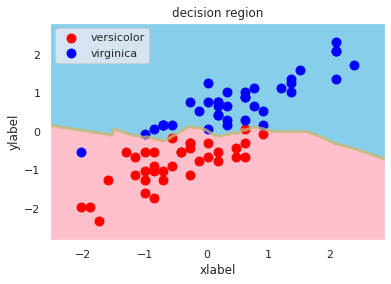

In [14]:
decision_region(X_train_trans, y_train, neigh5)

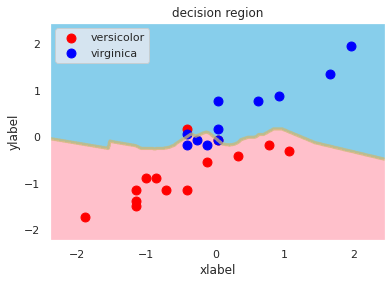

In [15]:
decision_region(X_test_trans, y_test, neigh3)

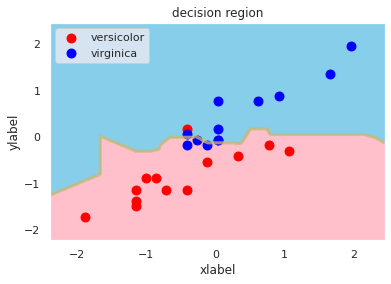

In [16]:
decision_region(X_test_trans, y_test, neigh1)

### [Problem 8] Learning by other methods

---



In [17]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)

**- Using Logistic Regression:**

In [18]:
from sklearn.linear_model import *

logregression = LogisticRegression()
logregression.fit(X_train_trans, y_train)
log_predict = logregression.predict(X_test_trans)
result_log = pd.DataFrame([log_predict, y_test], index=['Predict', 'Actual value'])
result_log

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [19]:
evaluation(y_test, log_predict)

Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


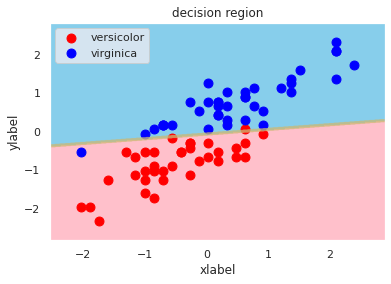

In [20]:
decision_region(X_train_trans, y_train, logregression)

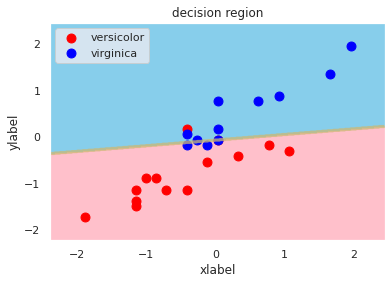

In [21]:
decision_region(X_test_trans, y_test, logregression)

**- SVM**

In [22]:
from sklearn.svm import *
from sklearn.pipeline import make_pipeline
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_trans, y_train)
svm_predict = svm.predict(X_test_trans)
result_svm = pd.DataFrame([svm_predict, y_test], index=['Predict', 'Actual value'])
result_svm

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [23]:
evaluation(y_test, svm_predict)

Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


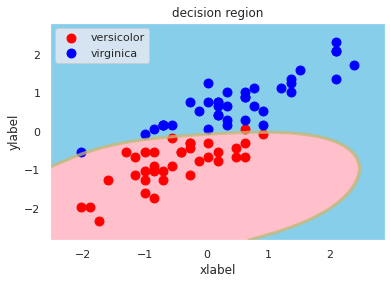

In [24]:
decision_region(X_train_trans, y_train, svm)

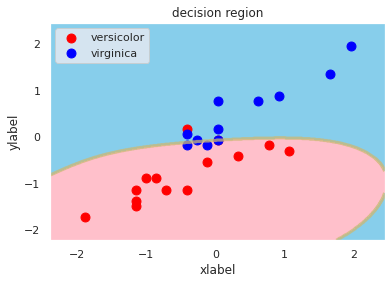

In [25]:
decision_region(X_test_trans, y_test, svm)

**- Decision tree**

In [26]:
from sklearn.tree import *

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_trans, y_train)
detree_predict = decisiontree.predict(X_test_trans)
result_tree = pd.DataFrame([detree_predict, y_test], index=['Predict', 'Actual value'])
result_tree

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,1,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [27]:
evaluation(y_test, detree_predict)

Accuracy : 0.840
Precision: 0.812
Recall   : 0.929
F        : 0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


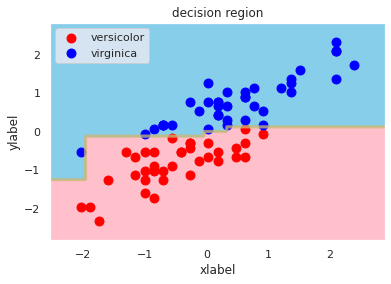

In [28]:
decision_region(X_train_trans, y_train, decisiontree)

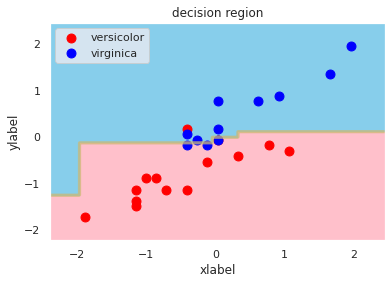

In [29]:
decision_region(X_test_trans, y_test, decisiontree)

**- Random forest**

In [30]:
from sklearn.ensemble import *

randomforest = RandomForestClassifier()
randomforest.fit(X_train_trans, y_train)
rafo_predict = randomforest.predict(X_test_trans)
result_rafo = pd.DataFrame([rafo_predict, y_test], index=['Predict', 'Actual value'])
result_rafo

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [31]:
evaluation(y_test, rafo_predict)

Accuracy : 0.800
Precision: 0.765
Recall   : 0.929
F        : 0.839
Confusion matrix:
 [[13  1]
 [ 4  7]]


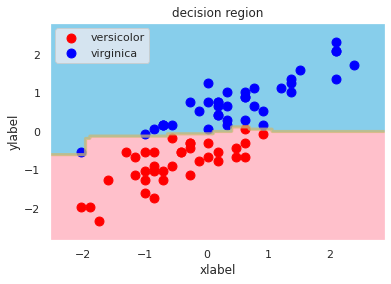

In [32]:
decision_region(X_train_trans, y_train, randomforest)

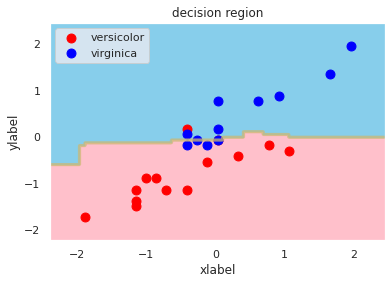

In [33]:
decision_region(X_test_trans, y_test, randomforest)

### [Problem 9] (Advanced task) Comparison with and without standardization

---



In [34]:
k_neigh_3 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(X_train, y_train.ravel())
pred_3 = k_neigh_3.predict(X_test)

evaluation(y_test, predict_3)

Accuracy : 0.800
Precision: 0.800
Recall   : 0.857
F        : 0.828
Confusion matrix:
 [[12  2]
 [ 3  8]]


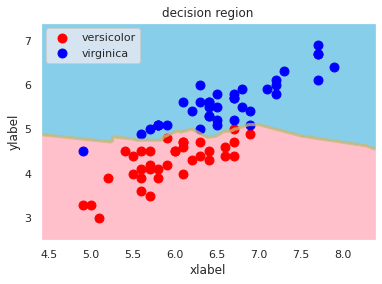

In [35]:
decision_region(X_train, y_train, k_neigh_3)

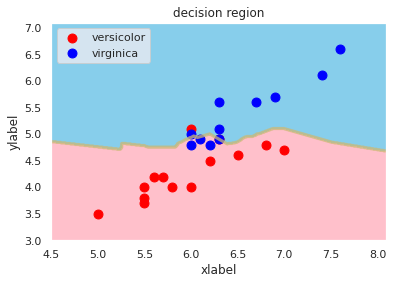

In [36]:
decision_region(X_test, y_test, k_neigh_3)

In [37]:
logregression_unscaled = LogisticRegression()
logregression_unscaled.fit(X_train, y_train)
log_predict_unscaled = logregression_unscaled.predict(X_test)

evaluation(y_test, log_predict_unscaled)

Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


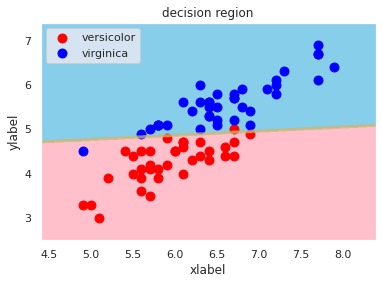

In [38]:
decision_region(X_train, y_train, logregression_unscaled)

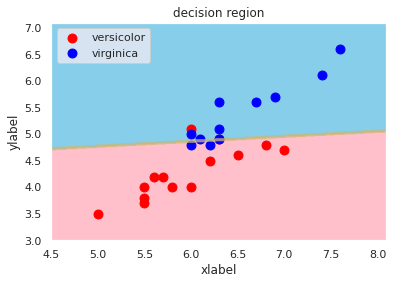

In [39]:
decision_region(X_test, y_test, logregression_unscaled)

In [40]:
svm_unscaled = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_unscaled.fit(X_train, y_train)
svm_predict_unscaled = svm_unscaled.predict(X_test)

evaluation(y_test, svm_predict_unscaled)

Accuracy : 0.840
Precision: 0.857
Recall   : 0.857
F        : 0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


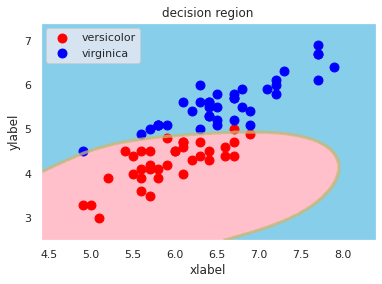

In [41]:
decision_region(X_train, y_train, svm_unscaled)

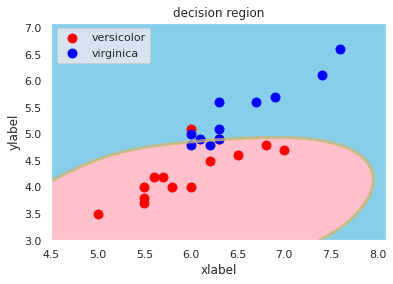

In [42]:
decision_region(X_test, y_test, svm_unscaled)

In [43]:
decisiontree_unscaled = DecisionTreeClassifier()
decisiontree_unscaled.fit(X_train, y_train)
dtree_predict_unscaled = decisiontree_unscaled.predict(X_test)

evaluation(y_test, dtree_predict_unscaled)

Accuracy : 0.840
Precision: 0.812
Recall   : 0.929
F        : 0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


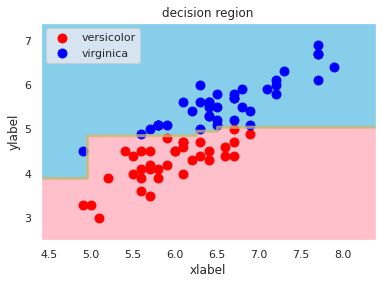

In [44]:
decision_region(X_train, y_train, decisiontree_unscaled)

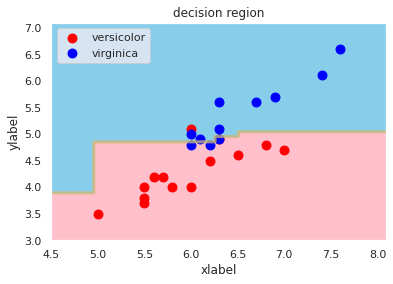

In [45]:
decision_region(X_test, y_test, decisiontree_unscaled)

In [46]:
randomforest_unscaled = RandomForestClassifier()
randomforest_unscaled.fit(X_train, y_train)
randforest_predict_unscaled = randomforest_unscaled.predict(X_test)

evaluation(y_test, randforest_predict_unscaled)

Accuracy : 0.840
Precision: 0.812
Recall   : 0.929
F        : 0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


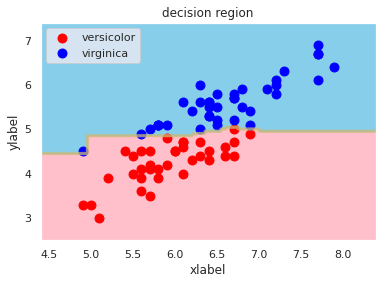

In [47]:
decision_region(X_train, y_train, randomforest_unscaled)

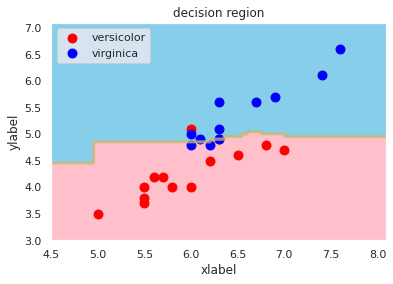

In [48]:
decision_region(X_test, y_test, randomforest_unscaled)

**What is standardization in machine learning?**

- Standardization is an important technique that is mostly performed as a pre-processing step before many Machine Learning models, to standardize the range of features of an input data set.

- Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

### [Problem 10] (Advance assignment) Highly accurate method using all objective variables

---



In [49]:
X = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df = df[['sepal_length', 'petal_length', 'Species']]
df

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [50]:
#Convert DataFrame to ndarray
X = df.loc[:, 'sepal_length':'petal_length'].values
y = df.loc[:, 'Species'].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(112, 2) (38, 2) (112,) (38,)


In [52]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)
X_train_scaled3 = scaler3.transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

neigh5_3 = KNeighborsClassifier()
neigh5_3.fit(X_train_scaled3, y_train3)
predict_5_3 = neigh5_3.predict(X_test_scaled3)

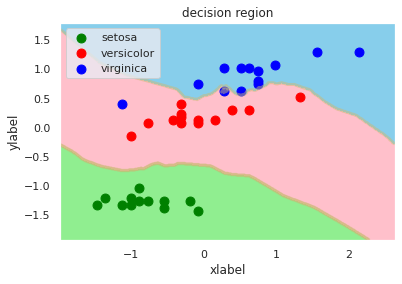

In [58]:
def decision_region_3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    if len(target_names) == 2:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
        n_class = 2
    elif len(target_names) == 3:
        scatter_color = ['green', 'red', 'blue']
        contourf_color = ['lightgreen', 'pink', 'skyblue']
        n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region_3(X_test_scaled3, y_test3, neigh5_3, target_names=['setosa', 'versicolor', 'virginica'])

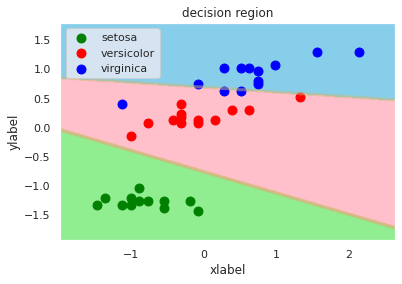

In [54]:
logregression3 = LogisticRegression()
logregression3.fit(X_train_scaled3, y_train3)
log_predict3 = logregression3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, logregression3, target_names=['setosa', 'versicolor', 'virginica'])

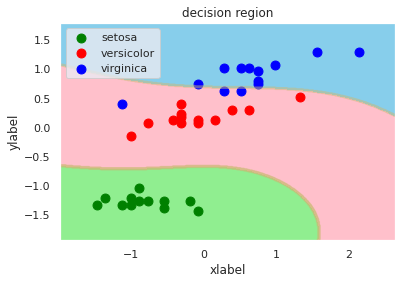

In [55]:
svm3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm3.fit(X_train_scaled3, y_train3)
svm_predict3 = svm3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, svm3, target_names=['setosa', 'versicolor', 'virginica'])

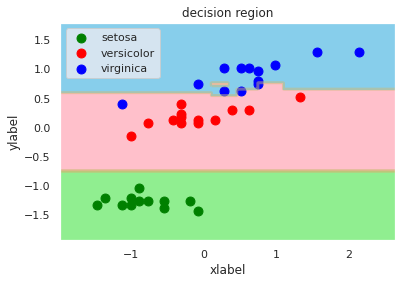

In [56]:
decisiontree3 = DecisionTreeClassifier()
decisiontree3.fit(X_train_scaled3, y_train3)
detree_predict3 = decisiontree3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, decisiontree3, target_names=['setosa', 'versicolor', 'virginica'])

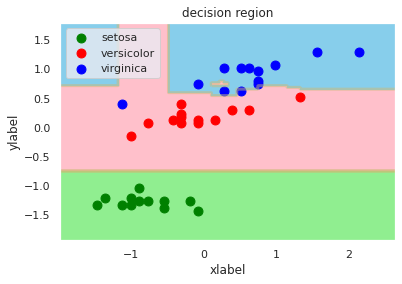

In [57]:
randomforest3 = RandomForestClassifier()
randomforest3.fit(X_train_scaled3, y_train3)
rafo_predict3 = randomforest3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, randomforest3, target_names=['setosa', 'versicolor', 'virginica'])